# Shop - Customer

Shop Customer Data is available for free in kaggle and it is imaginative data.
It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards and behavior of customer.

Dataset consists of 2000 records and 8 columns:
Customer ID
Gender
Age
Annual Income
Spending Score - Score assigned by the shop, based on customer behavior and spending nature
Profession
Work Experience - in years
Family Size

Going to do the analysis of that data set to help a business and the behavior of customer 
This Course helped me to gain knowledge about the important libraries used for data analysis like numpy,pandas,matplotlib.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*c_y1MP2PaxKBJm53x-t_lw.png)

## Downloading the Dataset

Downloading the dataset from kaggle by using opendatasets

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/datascientistanna/customers-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tharunganesh28
Your Kaggle Key: ········


100%|██████████| 23.2k/23.2k [00:00<00:00, 16.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './customers-dataset'

In [5]:
import os
os.listdir(data_dir)

['Customers.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "shop-customer-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [20]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "ganeshtharun98/Shop-Customer-Analysis"
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'

## Data Preparation and Cleaning

** We are going to prepare the data by cleaning as this step is important for the Analysis. If you don't perform Data Cleaning then we might analyse the data Wrongly.



In [9]:
##Importing necessary Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
shop_df = pd.read_csv('./customers-dataset/Customers.csv')

In [11]:
#To view the top 5 rows of data
shop_df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [12]:
#To know the shape of the dataset (no of rows and columns)
shop_df.shape

(2000, 8)

In [13]:
#Information about the datset
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [14]:
#Descriptive Statistics of the Datset
shop_df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Removing the CustomerID column as it is just like an index and not necessary

In [15]:
shop_df = shop_df.drop(['CustomerID'],axis=1)

In [16]:
##Checking Null Values are there or not
shop_df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

All the null values are from Profession so we can handle the null values in 2 ways:-
1:- By Adding the profession as Unknown
2:- By removig all the null values.

In [17]:
##Filling the Null Values of Profession as Unknown
shop_df['Profession'] = shop_df['Profession'].fillna('Unknown')

In [18]:
##Removing Null Values
##shop_df = shop_df.dropna().reset_index(drop=True)

In [19]:
shop_df.isnull().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [20]:
shop_df.shape

(2000, 7)

In [21]:
#Checking for any Duplicated Data
shop_df.duplicated().sum()

0

In [22]:
shop_df.Age.describe()

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

Here We can see the min Age is 0 which is not suitable for the dataset so handling the Age Column
-> Replacing all the Age less than 10 with median Age because that age Children don't have any income and we can assume other age people have something income sources like pocket-money or salary etc..

In [23]:
median_age = shop_df['Age'].median()

In [24]:
shop_df.loc[(shop_df['Age']<10),'Age'] = median_age

In [25]:
shop_df.Age.describe()

count    2000.000000
mean       53.013500
std        24.606952
min        10.000000
25%        33.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

In [26]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ganeshtharun98/shop-customer-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'

## Exploratory Analysis and Visualization

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of patterns and relationships within the data

In [27]:
#Check Unique values in Categorical Data
shop_df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Unknown'],
      dtype=object)

In [28]:
shop_df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unknown           35
Name: Profession, dtype: int64

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Countplot for Profession column
**Count plot :-Show the counts of observations in each categorical bin using bars**

Text(0, 0.5, 'No of Customers')

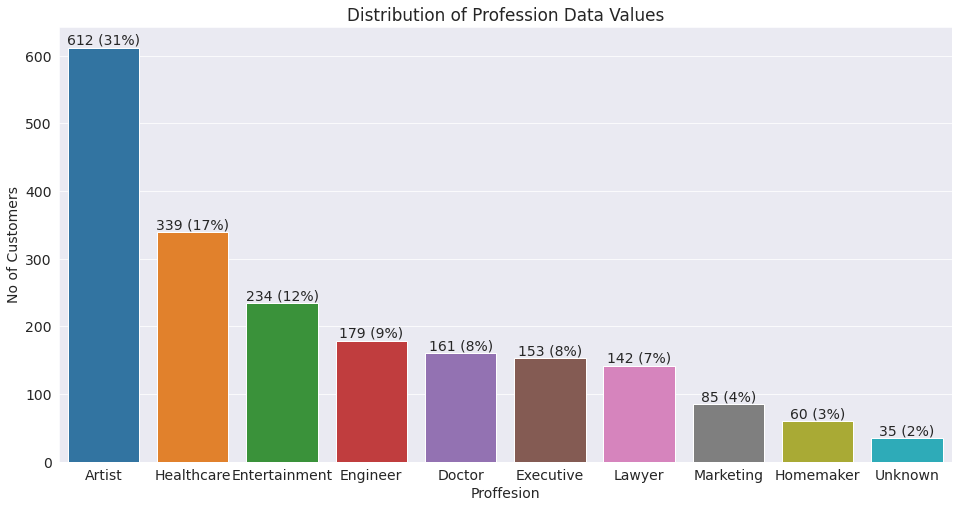

In [32]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x=shop_df['Profession'],
                   order=shop_df['Profession'].value_counts(ascending=False).index);
        
abs_values = shop_df['Profession'].value_counts(ascending=False)
rel_values = shop_df['Profession'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title("Distribution of Profession Data Values")

ax.set_xlabel('Proffesion')
ax.set_ylabel('No of Customers')

**Percentage and Number of customers across each proffession**
-  It can be observed that around 30% of the total customers are classified as artists
-  Healthcare professionals cover around 17% of the total customers, making it the second-largest group
-  Unknown constitute the least fraction of customers, with only 2% of the total customers belonging to this   category.

### Pie Chart for Gender Column 
**Pie Chart :-A pie chart is a circular statistical chart, which is divided into sectors to illustrate numerical proportion**

In [33]:
gender_count = shop_df["Gender"].value_counts()
print(gender_count)

Female    1186
Male       814
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender')

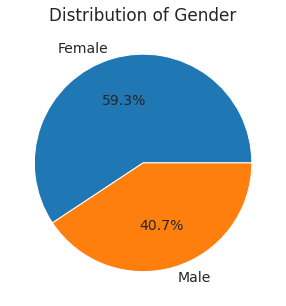

In [34]:
gender_count.plot(kind='pie',autopct="%1.1f%%",label="")
plt.title("Distribution of Gender")

**Percentage of Male and Female Customers**
- It is evident from the dataset that the number of female candidates is significantly higher than the number of male candidates.

### Bar plot for Male and Female with respective to their Profession
**Bar plot :- It shows the relationship between a numeric and a categoric variable.**

Text(0, 0.5, 'Spending Score')

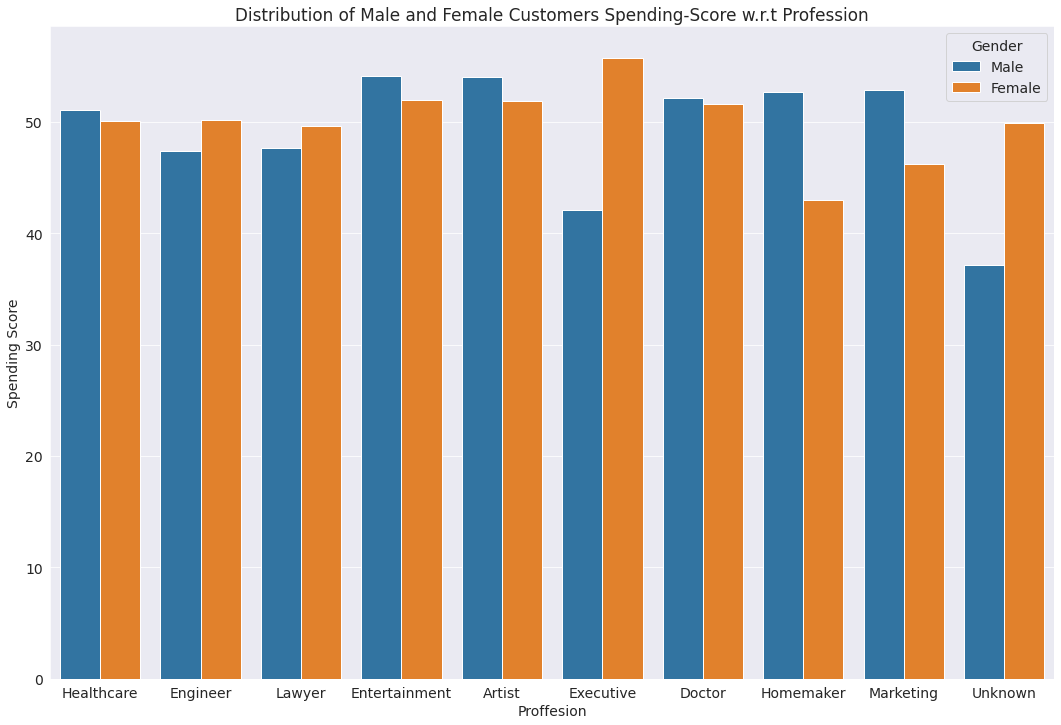

In [35]:
plt.figure(figsize=(18,12))
ax = sns.barplot(data=shop_df, x=shop_df['Profession'], y=shop_df['Spending Score (1-100)'],ci = None, hue='Gender')
plt.title("Distribution of Male and Female Customers Spending-Score w.r.t Profession")
ax.set_xlabel('Proffesion')
ax.set_ylabel('Spending Score')

**Spending Score of Male and Female Customers with respective to their Profession**
- In Executive Profession Female Customers has high spending score.
- Male customers has high Spending Score in Entertainment and Artist Profession.

### Box plot for  Work Experience grouped by profession
**Box plot :- A boxplot is a standardized way of displaying the distribution of data based on a five number summary**

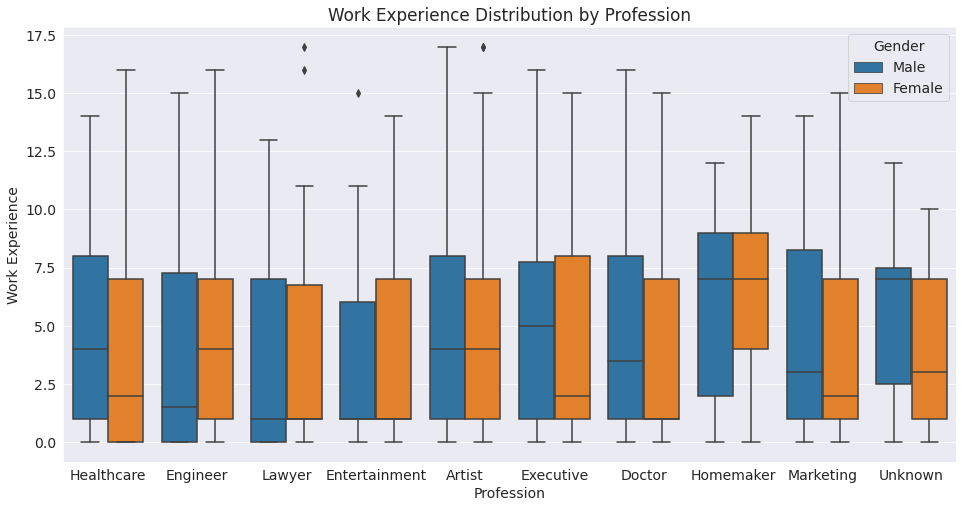

In [36]:
plt.figure(figsize=(16,8))
fig = sns.boxplot(data=shop_df, x='Profession', y='Work Experience',hue="Gender")
plt.title('Work Experience Distribution by Profession')
plt.show()

**Work Experience of Male and Female Customers across different professions**
- In engineering, the median experience value for females is much higher than that of males.
- In Artist and Home-Maker, the median experience value for both Genders are same.
- Most of the outliers are Female in Lawyer and Artist Profession

### Pair Plot
**Pair plot :-To plot multiple pairwise bivariate distributions in a dataset**

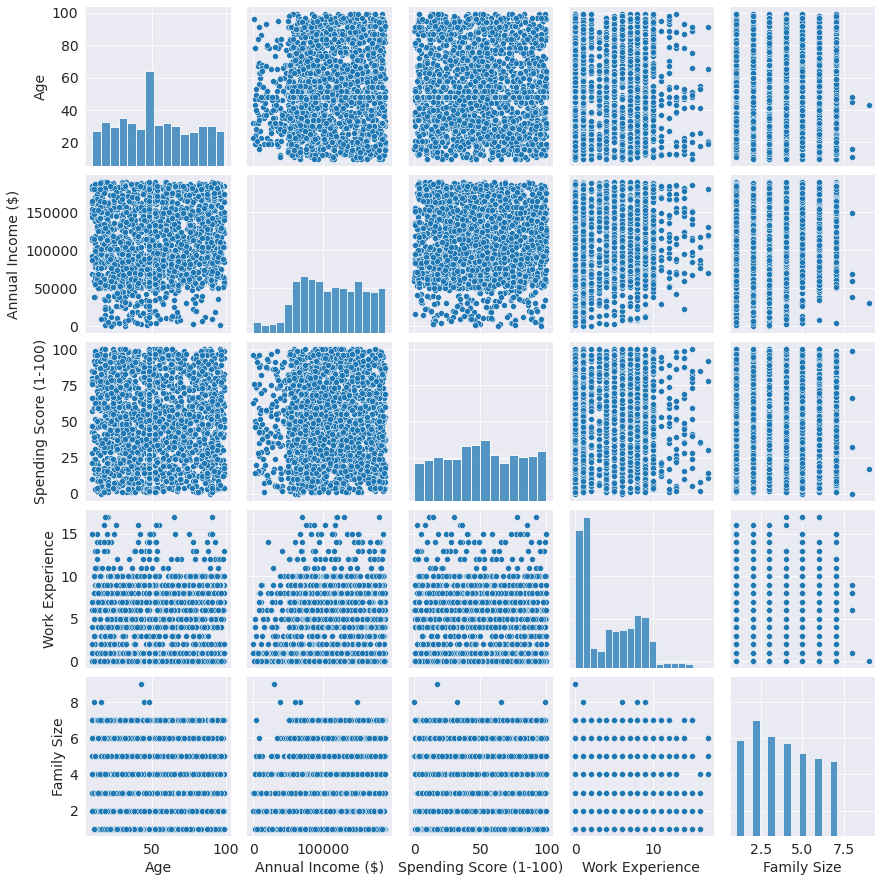

In [37]:
sns.pairplot(shop_df)

**To know the pairwise relationships between the datasets**
- There is no Strong Relation between any Columns

### Heat Map of Correlation
**Heat Map :-Heat-map is defined as a graphical representation of data using colors to visualize the value of the matrix**

<AxesSubplot:>

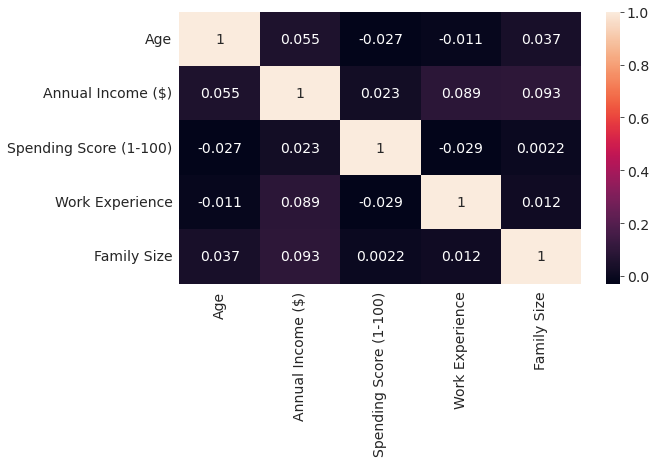

In [38]:
sns.heatmap(shop_df.corr(),annot=True)

**To know the Correlation Value between the Columns**
- All the values are less than 0.1
- There are no strong correlations between the features in the data set

Let us save and upload our work to Jovian before continuing

In [39]:
import jovian

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ganeshtharun98/shop-customer-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'

## Asking and Answering Questions

#### Q1:What are the top 5 Profession in customers?

In [80]:
Profession = shop_df.groupby('Profession').count()
Profession.drop(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], axis=1, inplace=True)
Profession.rename(columns={"Gender":"count"}, inplace=True)
Profession = Profession.reset_index().sort_values(by='count',ascending=False).head(5)

In [81]:
Profession.head()

,Profession,count
0,Artist,612
5,Healthcare,339
3,Entertainment,234
2,Engineer,179
1,Doctor,161


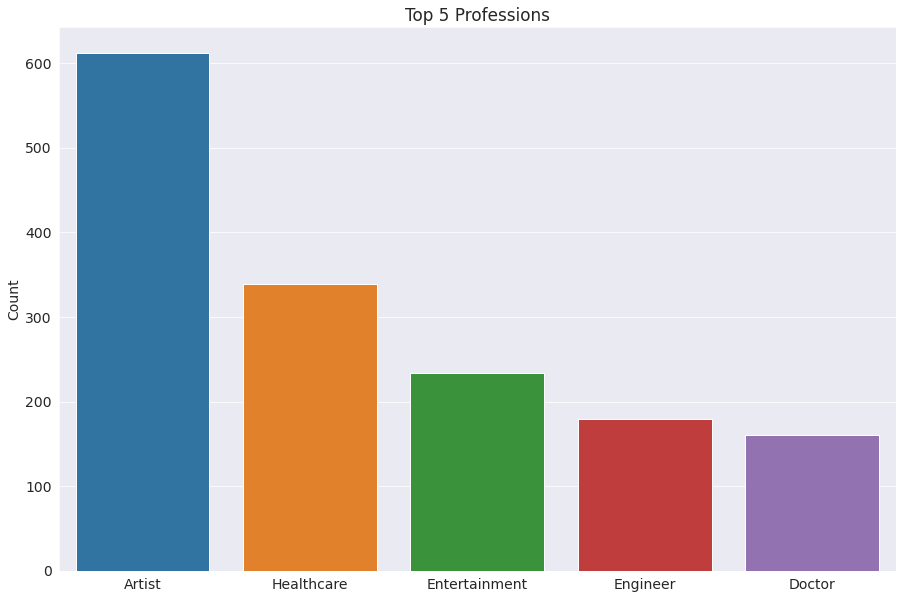

In [82]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.title.set_text("Top 5 Professions")
fig.patch.set_facecolor('white')
s = sns.barplot(data=Profession,
                 x='Profession',
                 y='count')
s.set(xlabel='', ylabel='Count');

- **Most Customers Profession is Artist followed by Health-Care and Entertainment. The amount of Artist Profession is remarkable.**

#### Q2: What is the mean annual_income of the customers ?

In [83]:
shop_df['Annual Income ($)'].mean()

110731.8215

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


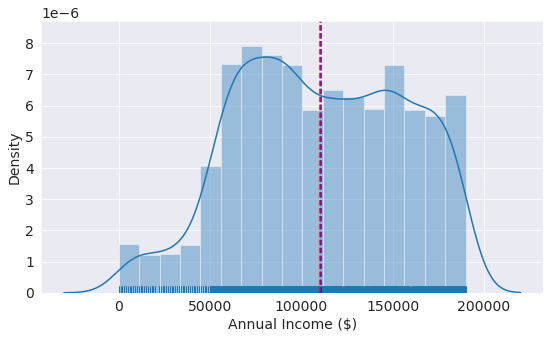

In [117]:
sns.distplot(shop_df['Annual Income ($)'], kde=True, rug=True);
plt.axvline(np.mean(shop_df['Annual Income ($)']),color='b', linestyle='--')
plt.axvline(np.median(shop_df['Annual Income ($)']),color='r', linestyle='--')

- **Mean and median annual_income of the customers = 110731.8215 which is almost same so we can conclude that the average customers annual income is around 110K**

#### Q3: How Many Customers  has more than 80 spending_score?

In [86]:
rslt_df = shop_df[(shop_df['Spending Score (1-100)']>80)]

In [88]:
rslt_df.shape

(396, 7)

In [44]:
rslt_df['Gender'].value_counts()

Female    234
Male      162
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Percentage with SpendingScore > 80')

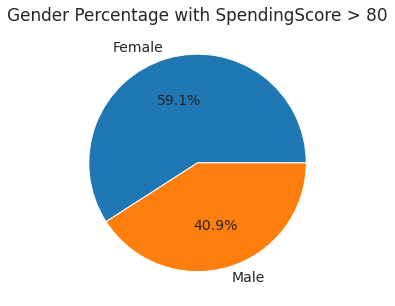

In [92]:
rslt_df['Gender'].value_counts().plot(kind='pie',autopct="%1.1f%%",label="")
plt.title("Gender Percentage with SpendingScore > 80")

- **Total 396 Customers has more than 80 Spending Score**
- **In that 396 Customers 234 were Female and 162 were Male**

#### Q4: Whats the Top 5  Working Experience of customers?

In [102]:
Work_Eperience = shop_df.groupby('Work Experience').count()
Work_Eperience.drop(['Age', 'Annual Income ($)', 'Spending Score (1-100)','Profession', 'Family Size'], axis=1, inplace=True)
Work_Eperience.rename(columns={"Gender":"count"}, inplace=True)
Work_Eperience = Work_Eperience.reset_index().sort_values(by='count',ascending=False).head(5)

In [112]:
Work_Eperience

,Work Experience,count
1,1,470
0,0,431
8,8,166
9,9,160
7,7,126


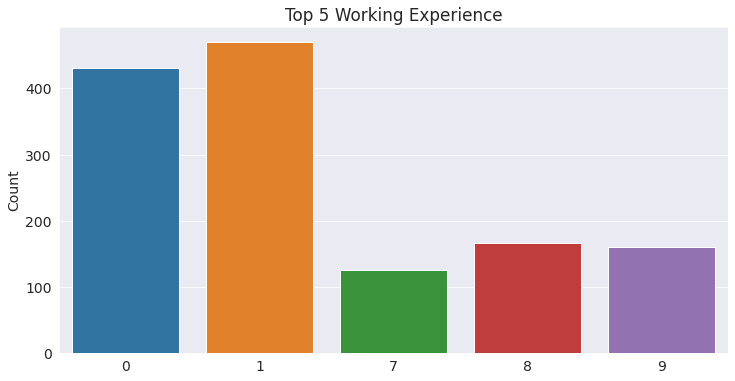

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.title.set_text("Top 5 Working Experience")
fig.patch.set_facecolor('white')
s = sns.barplot(data=Work_Eperience,
                 x='Work Experience',
                 y='count')
s.set(xlabel='', ylabel='Count');

- **470 customers with one year Work Experience are the highest and Zero Work Experience customers are second highest.**

#### Q5: What size of Family size are highest? 

In [115]:
shop_df['Family Size'].value_counts()

2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: Family Size, dtype: int64

Text(0, 0.5, 'count')

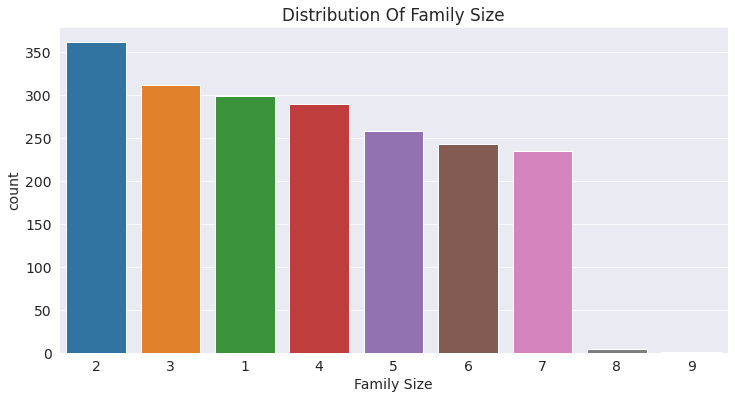

In [122]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=shop_df, x=shop_df['Family Size'],order=shop_df['Family Size'].value_counts().index)
plt.title("Distribution Of Family Size")
ax.set_ylabel('count')

- **Family_Size with 2 are the highest customers for this shop followed by 3 and 1.**


Let us save and upload our work to Jovian before continuing.

In [77]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ganeshtharun98/shop-customer-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'

## Inferences and Conclusion
- **Female customers are more in number for this shop**
- **Artist and Health-Care Profession customers also more in number**
- **Spending score has distributed high around 40-70**
- **Focus the customers who are female and Artist profession**

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ganeshtharun98/shop-customer-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'

## References and Future Work

**For Future work we can perform Clustering which is a type of unsupervised learning algorithm that involves grouping similar data points together based on their characteristics. 
The goal of clustering is to find similarities within a dataset and group similar data points together while keeping dissimilar data points separate.**

In [126]:
import jovian

In [128]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ganeshtharun98/shop-customer-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ganeshtharun98/shop-customer-analysis


'https://jovian.com/ganeshtharun98/shop-customer-analysis'